In [6]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']
import seaborn as sns
import numpy as np
import pylab
from datetime import date 
import scipy.stats as stats
from scipy.stats import shapiro,ttest_rel
from scipy.stats import pearsonr
from datetime import date, timedelta
import datetime
from natsort import natsorted
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2_contingency

In [7]:
for i in pd.read_excel("機構住民家屬測驗題前測_202311060100_65483abf0cd6f.xlsx", sheet_name="前測").columns:
    print(i)

機構代碼
編號:
測驗日期:_____年____月____日
題目1
題目2
題目3
題目4
題目5
題目6
題目7
題目8
題目9
題目10
題目11
題目12
題目13
題目14
題目15
題目16
題目17
題目18
題目19
題目20
題目21
題目22
題目23
題目24
題目25
題目26
題目27
題目28
題目29
題目30
題目31
題目32
題目33
題目34
題目35
題目36
題目37
題目38
題目39
題目40
題目41
題目42
題目43
題目44
題目45
題目46
題目47
題目48
題目49
題目50
1.1 出生年月：民國______年______月
1.2 性別：
1.3婚姻狀態(非必填)：
1.5 職業(非必填):
1.6 目前機構居住時間:_______年________月(以點做區隔)
1.7 合計機構居住時間:_________年________月(以點做區隔)
1.8目前平均月收入約(非必填):
1.9宗教信仰(非必填)：
1.10 吸菸習慣(非必填):
1.不吸菸，但有二手菸，每日吸到二手菸的時間約_______小時，已有______年(以點做區隔)(非必填)
2.目前吸菸，已吸______年，平均每天______支(以點做區隔)(非必填)
3.已戒菸，戒______年，以前每天約吸______支，吸________年。(以點做區隔)(非必填)
1.11 喝酒習慣(非必填):
1.目前喝酒，已喝______年，平均每天______CC，喝酒的種類:_________________________________(以點做區隔)(非必填)
2.已戒酒，戒______年，以前已喝__________年，平均每天______CC，喝酒的種類:__________________(以點做區隔)(非必填)
2.1高血壓
2.1.1是否服藥(非必選)
使用藥物名稱(非必填)
2.2糖尿病
2.2.1是否服藥(非必填)
使用藥物名稱(非必填).1
2.3血脂異常
2.3.1總膽固醇過高
2.3.1.1是否服藥(非必填)
使用藥物名稱(非必填).2
2.3.2三酸甘油酯過高
2.3.2.1是否服藥(非必填)
使用藥物名稱(非必填).3
2.3.3 高密度脂蛋白膽固醇過低
2.3.3.1是否服藥(非必填)
使用藥物名稱(非必填).4

In [12]:
before = pd.read_excel("機構住民家屬測驗題前測_202311060100_65483abf0cd6f.xlsx", sheet_name="前測", usecols=['編號:', '1.1 出生年月：民國______年______月', '1.2 性別：', 'Unnamed: 129', '題目1', '題目2', '題目3', '題目4', '題目5', '題目6', '題目7', '題目8', '題目9', '題目10', '題目11', '題目12', '題目13', '題目14', '題目15', '題目16', '題目17', '題目18', '題目19', '題目20', '題目21', '題目22', '題目23', '題目24', '題目25', '題目26', '題目27', '題目28', '題目29', '題目30', '題目31', '題目32', '題目33', '題目34', '題目35', '題目36', '題目37', '題目38', '題目39', '題目40', '題目41', '題目42', '題目43', '題目44', '題目45', '題目46', '題目47', '題目48', '題目49', '題目50'])
before.rename(columns={'編號:': 'ID', 'Unnamed: 129':'前測', '1.1 出生年月：民國______年______月':'出生', '1.2 性別：':'性別', '1.5 職業(非必填):':'職業', '1.6 現職工作年資:_______年________月(以點做區隔)':'年資', '1.7總工作年資:_________年________月(以點做區隔)':'總工作年資'}, inplace=True)
before['出生'] = pd.to_datetime(before['出生']).apply(lambda x: x.date())
before['年齡'] = before['出生'].apply(lambda x:(date.today()-x)/timedelta(days=365.2425))
before['性別'] = before['性別'].replace(['0.女', '1.男'], ['女', '男'])
before['年齡'] = before['年齡'].apply(lambda x:round(x, 1))
before.drop_duplicates(inplace=True)
print(before)

    ID 題目1 題目2 題目3 題目4 題目5 題目6 題目7 題目8 題目9 題目10 題目11 題目12 題目13 題目14 題目15 題目16  \
0    1   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
1    2   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
2    3   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
3    4   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
4    5   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
5    6   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
6   10   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
7   19   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
8   20   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
9   21   O   O   O   O   O   O   O   O   O    X    O    O    O    O    O    O   
10  22   O   O   O   O   O   O   O   O   O    O    O    O    O    O    O    O   
11  23   O   O   O   O   O  

In [14]:
after = pd.read_excel("機構住民家屬測驗題前測_202311060100_65483abf0cd6f.xlsx", sheet_name="後測", usecols=['編號:', 'Unnamed: 63', '題目1', '題目2', '題目3', '題目4', '題目5', '題目6', '題目7', '題目8', '題目9', '題目10', '題目11', '題目12', '題目13', '題目14', '題目15', '題目16', '題目17', '題目18', '題目19', '題目20', '題目21', '題目22', '題目23', '題目24', '題目25', '題目26', '題目27', '題目28', '題目29', '題目30', '題目31', '題目32', '題目33', '題目34', '題目35', '題目36', '題目37', '題目38', '題目39', '題目40', '題目41', '題目42', '題目43', '題目44', '題目45', '題目46', '題目47', '題目48', '題目49', '題目50'])
after.rename(columns={'編號:': 'ID', 'Unnamed: 63': '後測'}, inplace=True)

In [15]:
df = pd.merge(before, after, on='ID')
first_cols = ['ID', '出生', '性別', '前測', '後測']
other_cols = natsorted(df.columns.difference(first_cols).tolist())
df = df.loc[:, first_cols+other_cols]
df

,ID,出生,性別,前測,後測,年齡,題目1_x,題目1_y,題目2_x,題目2_y,題目3_x,題目3_y,題目4_x,題目4_y,題目5_x,題目5_y,題目6_x,題目6_y,題目7_x,題目7_y,題目8_x,題目8_y,題目9_x,題目9_y,題目10_x,題目10_y,題目11_x,題目11_y,題目12_x,題目12_y,題目13_x,題目13_y,題目14_x,題目14_y,題目15_x,題目15_y,題目16_x,題目16_y,題目17_x,題目17_y,題目18_x,題目18_y,題目19_x,題目19_y,題目20_x,題目20_y,題目21_x,題目21_y,題目22_x,題目22_y,題目23_x,題目23_y,題目24_x,題目24_y,題目25_x,題目25_y,題目26_x,題目26_y,題目27_x,題目27_y,題目28_x,題目28_y,題目29_x,題目29_y,題目30_x,題目30_y,題目31_x,題目31_y,題目32_x,題目32_y,題目33_x,題目33_y,題目34_x,題目34_y,題目35_x,題目35_y,題目36_x,題目36_y,題目37_x,題目37_y,題目38_x,題目38_y,題目39_x,題目39_y,題目40_x,題目40_y,題目41_x,題目41_y,題目42_x,題目42_y,題目43_x,題目43_y,題目44_x,題目44_y,題目45_x,題目45_y,題目46_x,題目46_y,題目47_x,題目47_y,題目48_x,題目48_y,題目49_x,題目49_y,題目50_x,題目50_y
0,1,1930-08-06,男,50,50,93.3,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
1,2,1936-07-25,男,50,50,87.4,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
2,3,1947-11-26,女,50,50,76.0,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
3,4,1954-08-20,女,50,50,69.3,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
4,5,1958-11-04,女,50,50,65.1,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
5,6,1927-10-20,女,50,50,96.1,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
6,10,1958-08-16,女,50,50,65.3,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
7,19,1975-03-13,男,50,50,48.7,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
8,20,1964-06-10,男,50,50,59.5,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
9,21,1950-05-12,男,48,50,73.6,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


In [16]:
# 顯示連續變量欄位的分佈
df.describe()

,ID,前測,後測,年齡
count,26.000000,26.000000,26.0,26.000000
mean,23.192308,49.653846,50.0,60.553846
std,13.868004,0.745241,0.0,23.849717
min,1.000000,47.000000,50.0,0.300000
25%,12.250000,50.000000,50.0,48.925000
50%,24.500000,50.000000,50.0,64.750000
75%,31.500000,50.000000,50.0,73.350000
max,48.000000,50.000000,50.0,97.800000


In [17]:
# 顯示類別變量欄位的分佈
df.describe(include='object')

,出生,性別,題目1_x,題目1_y,題目2_x,題目2_y,題目3_x,題目3_y,題目4_x,題目4_y,題目5_x,題目5_y,題目6_x,題目6_y,題目7_x,題目7_y,題目8_x,題目8_y,題目9_x,題目9_y,題目10_x,題目10_y,題目11_x,題目11_y,題目12_x,題目12_y,題目13_x,題目13_y,題目14_x,題目14_y,題目15_x,題目15_y,題目16_x,題目16_y,題目17_x,題目17_y,題目18_x,題目18_y,題目19_x,題目19_y,題目20_x,題目20_y,題目21_x,題目21_y,題目22_x,題目22_y,題目23_x,題目23_y,題目24_x,題目24_y,題目25_x,題目25_y,題目26_x,題目26_y,題目27_x,題目27_y,題目28_x,題目28_y,題目29_x,題目29_y,題目30_x,題目30_y,題目31_x,題目31_y,題目32_x,題目32_y,題目33_x,題目33_y,題目34_x,題目34_y,題目35_x,題目35_y,題目36_x,題目36_y,題目37_x,題目37_y,題目38_x,題目38_y,題目39_x,題目39_y,題目40_x,題目40_y,題目41_x,題目41_y,題目42_x,題目42_y,題目43_x,題目43_y,題目44_x,題目44_y,題目45_x,題目45_y,題目46_x,題目46_y,題目47_x,題目47_y,題目48_x,題目48_y,題目49_x,題目49_y,題目50_x,題目50_y
count,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
unique,25,2,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,2023-08-11,女,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
freq,2,16,26,26,26,26,26,26,25,26,26,26,26,26,25,26,26,26,26,26,24,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,25,26,26,26,24,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,24,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


([<matplotlib.patches.Wedge at 0x1263eeca0>,
 [Text(-0.39006544982124386, 1.0285178388612184, '女'),
  Text(0.390065546118032, -1.0285178023406505, '男')],
 [Text(-0.21276297262976934, 0.5610097302879372, '61.5%\n(16)'),
  Text(0.2127630251552902, -0.5610097103676275, '38.5%\n(10)')])

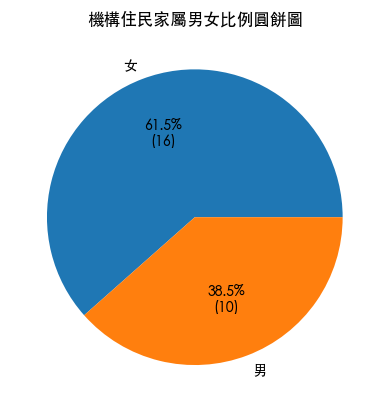

In [18]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['性別'].value_counts()
plt.title('機構住民家屬男女比例圓餅圖')
plt.pie(s,labels = s.index, autopct=autopct_format(s))

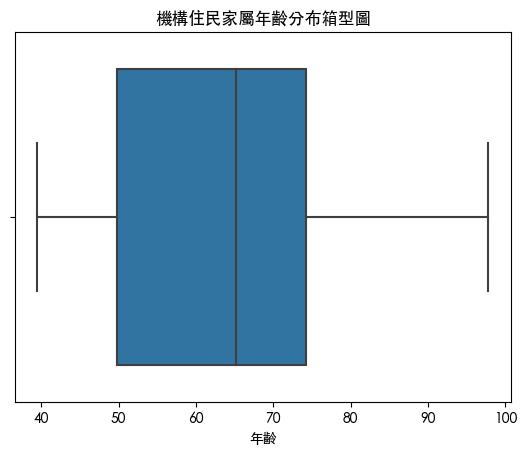

In [19]:
tmp = df[(df['年齡']<100)&(df['年齡']>18)]
sns.boxplot(x=tmp["年齡"],data=tmp)
plt.title("機構住民家屬年齡分布箱型圖")
plt.show()

Text(0.5, 1.0, '機構住民家屬年齡分布直方圖')

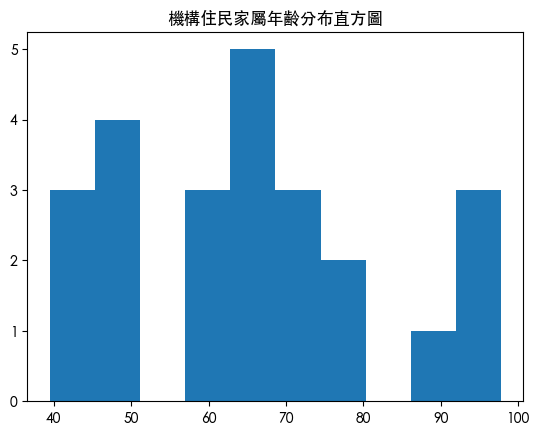

In [20]:
plt.hist(tmp['年齡'])
plt.title("機構住民家屬年齡分布直方圖")

In [21]:
target = []
for i in range(1, 51):
    target.append(f'題目{i}')
for i in target:
    print(i)
    X = f'{i}_x'
    Y = f'{i}_y'
    print('前測答對人數', str(len(df[df[X]=='O'])))
    print('後測答對人數', str(len(df[df[Y]=='O'])))
    # 創建二分類的列聯表
    contingency_table = [[len(df[(df[X]=='O')&(df[Y]=='O')]), len(df[(df[X]=='O')&(df[Y]=='X')])],
                        [len(df[(df[X]=='X')&(df[Y]=='O')]), len(df[(df[X]=='X')&(df[Y]=='X')])]] 

    # 執行 McNemar 檢定
    result = mcnemar(contingency_table)

    # 顯示結果
    print("McNemar statistic:", result.statistic)
    print("P-value:", result.pvalue)

    # 判斷結果是否顯著
    alpha = 0.05
    if result.pvalue < alpha:
        print("統計上顯著，可以拒絕虛無假設，表示學習狀況有進步。")
    else:
        print("統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。")
    print('='*50)

題目1
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目2
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目3
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目4
前測答對人數 25
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目5
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目6
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目7
前測答對人數 25
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目8
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目9
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目10
前測答對人數 24
後測答對人數 26
McNemar statistic: 0.0
P-value: 0.5
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目11
前測答對人數 26
後測答對人數 26
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目12
前測答對人數 26
後測答對

In [22]:
for i in target:
    try:
        print(i)
        X = f'{i}_x'
        Y = f'{i}_y'
        print('前測答對人數', str(len(df[df[X]=='O'])))
        print('後測答對人數', str(len(df[df[Y]=='O'])))
        # 創建二分類的列聯表
        contingency_table = [[len(df[(df[X]=='O')&(df[Y]=='O')]), len(df[(df[X]=='O')&(df[Y]=='X')])],
                            [len(df[(df[X]=='X')&(df[Y]=='O')]), len(df[(df[X]=='X')&(df[Y]=='X')])]] 
        # 執行卡方檢定
        result = chi2_contingency(contingency_table)

        # 顯示結果
        print("Chi-squared statistic:", result.statistic)
        print("P-value:", result.pvalue)

        # 判斷結果是否顯著
        alpha = 0.05
        if result.pvalue < alpha:
            print("統計上顯著，可以拒絕虛無假設，表示學習狀況有改善。")
        else:
            print("統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。")
    except:
        pass
    print('='*50)

題目1
前測答對人數 26
後測答對人數 26
題目2
前測答對人數 26
後測答對人數 26
題目3
前測答對人數 26
後測答對人數 26
題目4
前測答對人數 25
後測答對人數 26
題目5
前測答對人數 26
後測答對人數 26
題目6
前測答對人數 26
後測答對人數 26
題目7
前測答對人數 25
後測答對人數 26
題目8
前測答對人數 26
後測答對人數 26
題目9
前測答對人數 26
後測答對人數 26
題目10
前測答對人數 24
後測答對人數 26
題目11
前測答對人數 26
後測答對人數 26
題目12
前測答對人數 26
後測答對人數 26
題目13
前測答對人數 26
後測答對人數 26
題目14
前測答對人數 26
後測答對人數 26
題目15
前測答對人數 26
後測答對人數 26
題目16
前測答對人數 26
後測答對人數 26
題目17
前測答對人數 26
後測答對人數 26
題目18
前測答對人數 26
後測答對人數 26
題目19
前測答對人數 25
後測答對人數 26
題目20
前測答對人數 26
後測答對人數 26
題目21
前測答對人數 24
後測答對人數 26
題目22
前測答對人數 26
後測答對人數 26
題目23
前測答對人數 26
後測答對人數 26
題目24
前測答對人數 26
後測答對人數 26
題目25
前測答對人數 26
後測答對人數 26
題目26
前測答對人數 26
後測答對人數 26
題目27
前測答對人數 26
後測答對人數 26
題目28
前測答對人數 26
後測答對人數 26
題目29
前測答對人數 26
後測答對人數 26
題目30
前測答對人數 26
後測答對人數 26
題目31
前測答對人數 26
後測答對人數 26
題目32
前測答對人數 26
後測答對人數 26
題目33
前測答對人數 24
後測答對人數 26
題目34
前測答對人數 26
後測答對人數 26
題目35
前測答對人數 26
後測答對人數 26
題目36
前測答對人數 26
後測答對人數 26
題目37
前測答對人數 26
後測答對人數 26
題目38
前測答對人數 26
後測答對人數 26
題目39
前測答對人數 26
後測答對人數 26
題目40
前測答對人數 26
後測答對人數 26
題目41
前測答對

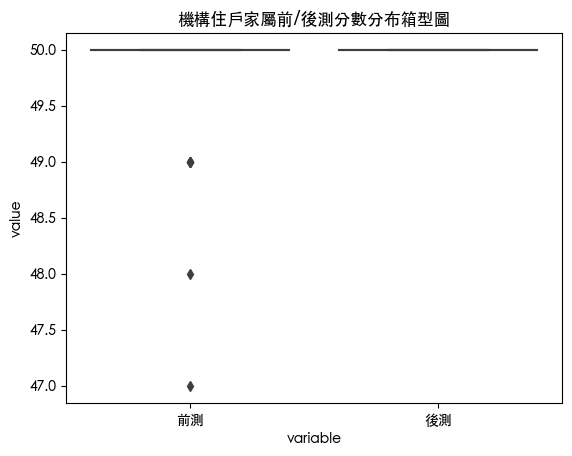

In [23]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['前測', '後測']]))
plt.title("機構住戶家屬前/後測分數分布箱型圖")
plt.show()

In [24]:
from scipy.stats import wilcoxon

# 使用 Wilcoxon 符號秩測試 雙尾檢定
statistic, p_value = wilcoxon(df['前測'].tolist(),  df['後測'].tolist(), alternative='two-sided')

# 顯示結果
print("Wilcoxon statistic:", statistic)
print("P-value:", p_value)

# 判斷結果是否顯著
alpha = 0.05
if p_value < alpha:
    print("統計上顯著，可以拒絕虛無假設，表示前後測有差異。")
else:
    print("統計上不顯著，不能拒絕虛無假設，表示前後測無差異。")

Wilcoxon statistic: 0.0
P-value: 0.023544102412552784
統計上顯著，可以拒絕虛無假設，表示前後測有差異。


/Users/yasmine/miniconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/yasmine/miniconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
